In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load boston house pricing dataset
from sklearn.datasets import  fetch_california_housing

In [5]:
california_df = fetch_california_housing()


In [6]:
california_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
#Check the description of the dataset
print(california_df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
print(california_df.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


### Preparing the dataset

In [9]:
#dataset = pd.DataFrame(california_df.data,columns=california_df.feature_names)
dataset = pd.read_csv(r"E:\Studies\Data-Analysis-Projects\End-end-ML-project\boston-housing-dataset.csv")

In [10]:
# """
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's - Target variable.
# """

In [11]:
dataset.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
#dataset['Price ($100,000)'] = california_df.target

In [13]:
#dataset.head()

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [15]:
dataset.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

In [16]:
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [17]:
# Exploratory Data Analysis
#Correlation

In [18]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [19]:
# import seaborn as sns
# sns.pairplot(dataset)

Text(0, 0.5, 'Price')

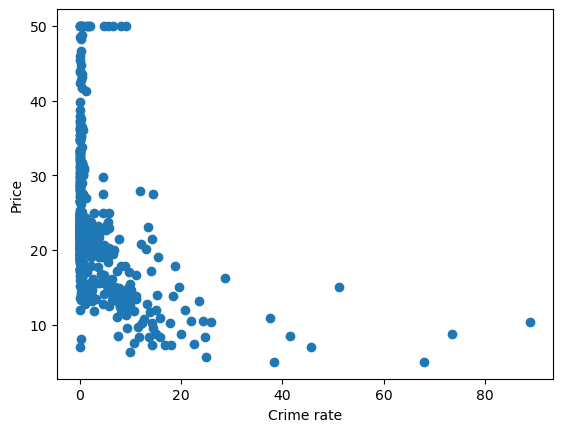

In [20]:
plt.scatter(dataset['CRIM'],dataset['MEDV'])
plt.xlabel('Crime rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

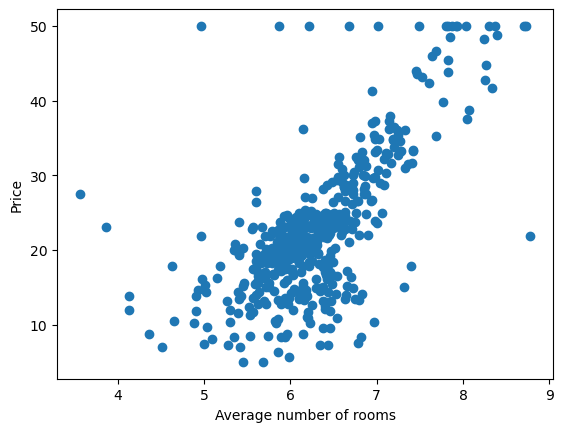

In [21]:
plt.scatter(dataset['RM'],dataset['MEDV'])
plt.xlabel('Average number of rooms')
plt.ylabel('Price')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

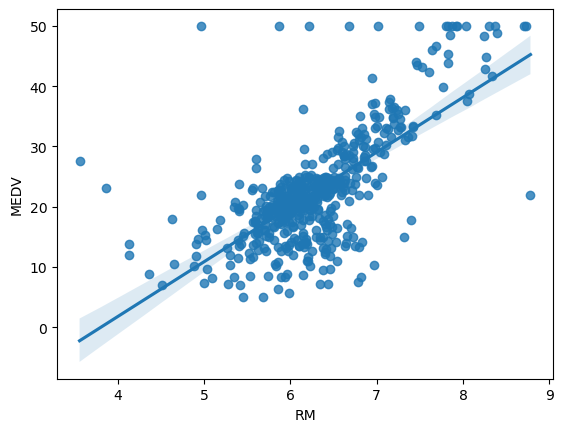

In [22]:
import seaborn as sns
sns.regplot(x='RM',y='MEDV',data=dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

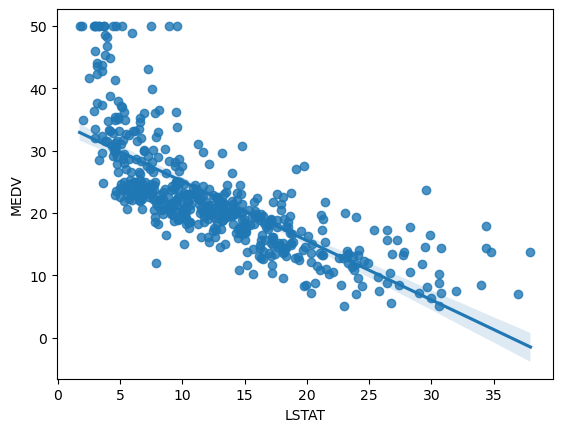

In [23]:
sns.regplot(x='LSTAT',y='MEDV',data=dataset)

<AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>

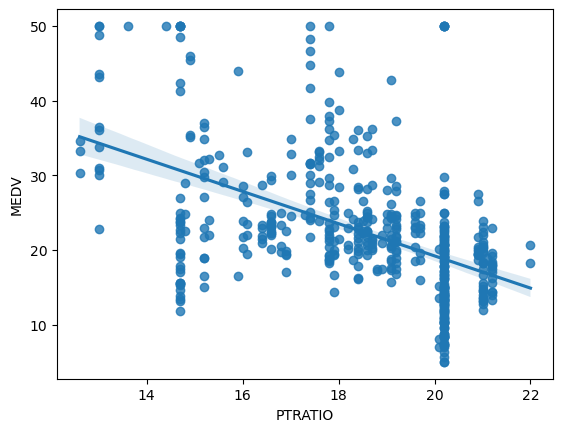

In [24]:
sns.regplot(x='PTRATIO',y='MEDV',data=dataset)

In [25]:
#Independent and Dependent features
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [26]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [27]:
#Train_Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)

In [28]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [29]:
#Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

### Model Training

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(X_train,y_train)

LinearRegression()

In [35]:
#Printing coefficients and intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [36]:
print(regression.intercept_)

23.01581920903955


In [37]:
#Predicion part
reg_pred = regression.predict(X_test)

In [38]:
print(reg_pred)

[28.64896005 36.49501384 15.4111932  25.40321303 18.85527988 23.14668944
 17.3921241  14.07859899 23.03692679 20.59943345 24.82286159 18.53057049
 -6.86543527 21.80172334 19.22571177 26.19191985 20.27733882  5.61596432
 40.44887974 17.57695918 27.44319095 30.1715964  10.94055823 24.02083139
 18.07693812 15.934748   23.12614028 14.56052142 22.33482544 19.3257627
 22.16564973 25.19476081 25.31372473 18.51345025 16.6223286  17.50268505
 30.94992991 20.19201752 23.90440431 24.86975466 13.93767876 31.82504715
 42.56978796 17.62323805 27.01963242 17.19006621 13.80594006 26.10356557
 20.31516118 30.08649576 21.3124053  34.15739602 15.60444981 26.11247588
 39.31613646 22.99282065 18.95764781 33.05555669 24.85114223 12.91729352
 22.68101452 30.80336295 31.63522027 16.29833689 21.07379993 16.57699669
 20.36362023 26.15615896 31.06833034 11.98679953 20.42550472 27.55676301
 10.94316981 16.82660609 23.92909733  5.28065815 21.43504661 41.33684993
 18.22211675  9.48269245 21.19857446 12.95001331 21.

Text(0, 0.5, 'reg_pred')

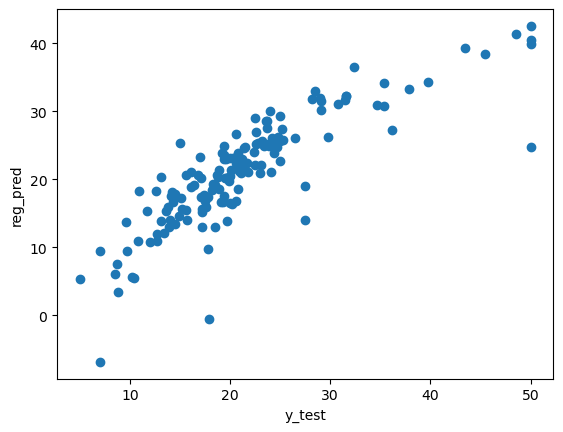

In [39]:
#Scatter plot for prediction
plt.scatter(y_test,reg_pred)
plt.xlabel('y_test')
plt.ylabel('reg_pred')

In [40]:
residuals = y_test-reg_pred

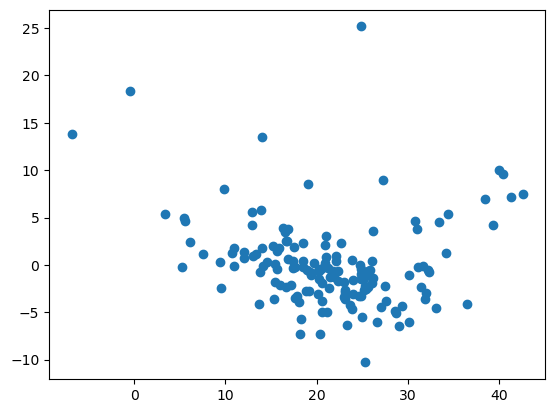

In [41]:
#Uniform distribution
plt.scatter(reg_pred,residuals)

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred))) #Root mean squared error

21.517444231177212
3.162709871457406
4.638689926172821


### R-square and Adjusted R-square

In [43]:
from sklearn.metrics import r2_score
print(r2_score(y_test,reg_pred)) #More closer to 1, more better is the score
#Calculate adjusted R-square with the formula, no built-in library

0.7112260057484932


### New data prediction

In [44]:
dataset.iloc[0:1,:-1].shape

(1, 13)

In [45]:
regression.predict(scaler.transform(dataset.iloc[0:1,:-1]))

array([30.08649576])

### Pickling the model file for deployment

In [46]:
import pickle

In [48]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [49]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [50]:
pickled_model.predict(scaler.transform(dataset.iloc[0:1,:-1]))

array([30.08649576])